In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import jieba
from IPython.display import HTML
%matplotlib inline

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')



In [3]:
sns.set()
os.chdir('/Users/Steve/Desktop')

In [4]:
data = pd.read_csv("wechat_project.csv")

In [5]:
def str_len(str):
    try:
        row_l=len(str)
        utf8_l=len(str.encode('utf-8'))
        return ((utf8_l-row_l)/2+row_l)/2
    except:
        return None
    return None

In [6]:
data['Topic_len'] = data.Topic.apply(str_len)

## Understanding the dataset

The variables in the wechant_project.csv dataset are:

|  **Field**      |     **Description**  | 
| -------------    |:-------------:     | 
|Date                  |    The date when the article is posted |           
|Topic                                      |              The Topic of the article |
|Owner                 | The Writer of the article |
|PV                    | Measures the total number of clicks the article receives |
|TA                    | Measures the total number of shares the article receives |
|num_new_follower      | Denotes the number of new follwers on the day when the article is posted  |
|num_unfollow          | Denotes the number of unfollow on the day when the article is posted|
|net_follower_change  |  Denotes the change of the number of followers on the day when the article is posted (New follower - Unfollwer)|
|category             |  Denotes the Category of the article|
|word_count           |  Denotes the number of words in the article|
|num_pictures          | Denotes the number of picutures included in the post|
|episode            |    Denotes whether the article is one episode of a series |
|greater_1k          |   Denotes whether the article has received more than 1000 PVs|
|weekday              |  Denotes the day of the week when the article was posted|
|num_readers          |  Measures the number of individuals who read the article|
|num_sub_reader         | Measures the number of individuals who read the article|
|num_moment           |  Measures the number of clicks from WeChat Moment|
|num_favorites         | Measures the number of favorites of each article |
|share_rate             | Measures the percentage of shares from total PVs (TA/PV) |
|promo_rate             | Measures the effectiveness of the shared article, evaluated by the net increase in followers (net_follower_change/TA) |
|sub_read_rate            | Measures the proportion of the readers who clicked the post in their subscription page (num_sub_reader/num_readers)|
|moments_read_rate         | Measures the proportion of the readers who clicked the post in their moments (num_moment/num_readers)|
|Topic_len              | Denotes the length of the topic |

Among all the variables in the data dictionary, I identified some of the varibles as the key metrics that we should keep monitoring:

1. PV: Total Page Views is one of the best indicators of the popularity of the article, primarily determined by the topic itself, cover picture, and abstract. 
2. TA: TA is the key metric primarily determined by the quality of the article, which is also crucial to reach beyond our followers.

3. Net Follower Change: Measures the growth of the audience of our official account, as one of the most important metrics to keep track of.
4. Sharing Rate: The proportion of the readers who shared the article with their friends or in their moments.
5. Promotion Rate: Calculated by dividing the net follower change by TA, this metric shows the effectiveness of the promotion by our readers.
6. Moment Reader Rate: Calculated by dividing the number of readers who interacts with the article in the "Moment" section by the total readers. 
    
Thus, these 6 metrics consists our KPIs that are crucial to the success of online marketing on WeChat platform.

## Dealing with Missing Values and Outliers in the Dataset


### Missing Values

In [7]:
data.info() # Checking if there are missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 24 columns):
Date                   110 non-null object
Topic                  110 non-null object
Owner                  110 non-null object
Type                   110 non-null object
PV                     110 non-null int64
TA                     110 non-null int64
num_follower           110 non-null int64
num_unfollow           110 non-null int64
net_follower_change    110 non-null int64
category               108 non-null object
word_count             108 non-null float64
num_pictures           110 non-null int64
episode                110 non-null object
greater_1k             110 non-null int64
weekday                110 non-null int64
num_readers            110 non-null int64
num_sub_read           110 non-null int64
num_moment             110 non-null int64
num_favorites          110 non-null int64
share_rate             110 non-null float64
promo_rate             110 non-null float64
s

It is important to handle the missing values and outliers in the dataset. We can see that there are three data points with missing values in the dataset because their content is related to Spring Festival. Consequently, it is not necessary to use imputation to handle these data points, but simply remove it from our dataset.

In [8]:
df = data.dropna()
df_1000 = df[df['PV']>=1000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 109
Data columns (total 24 columns):
Date                   108 non-null object
Topic                  108 non-null object
Owner                  108 non-null object
Type                   108 non-null object
PV                     108 non-null int64
TA                     108 non-null int64
num_follower           108 non-null int64
num_unfollow           108 non-null int64
net_follower_change    108 non-null int64
category               108 non-null object
word_count             108 non-null float64
num_pictures           108 non-null int64
episode                108 non-null object
greater_1k             108 non-null int64
weekday                108 non-null int64
num_readers            108 non-null int64
num_sub_read           108 non-null int64
num_moment             108 non-null int64
num_favorites          108 non-null int64
share_rate             108 non-null float64
promo_rate             108 non-null float64
s

### Outliers

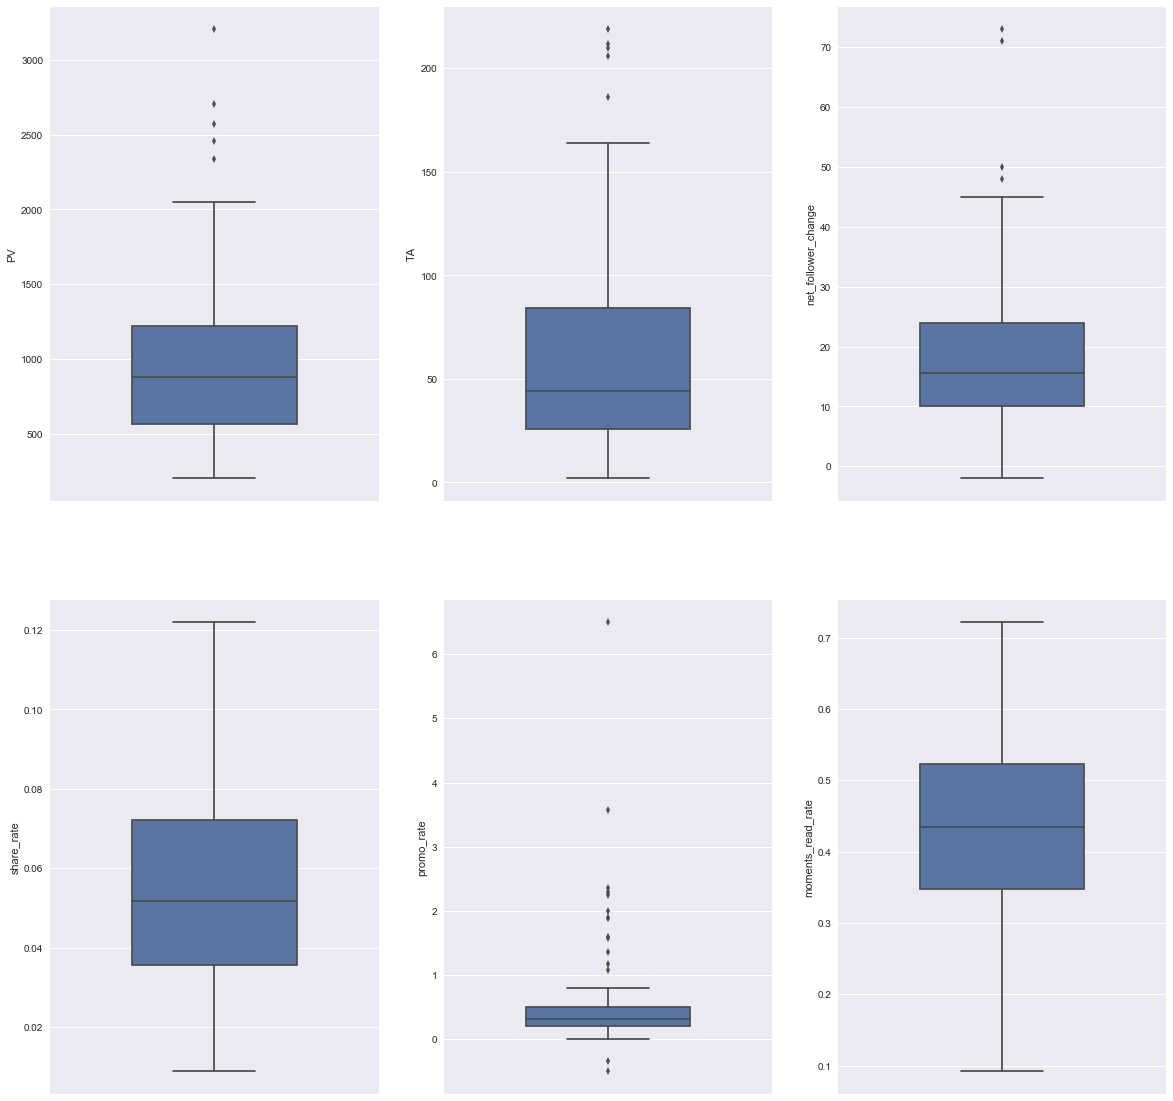

In [9]:
f, axes = plt.subplots(2, 3, figsize=(20,20))
sns.boxplot('PV', data=data,ax=axes[0,0],orient="v", width = 0.5)
sns.boxplot('TA', data=data,ax=axes[0,1],orient="v", width = 0.5)
sns.boxplot('net_follower_change', data=data,ax=axes[0,2],orient="v", width = 0.5)
sns.boxplot('share_rate', data=data,ax=axes[1,0],orient="v", width = 0.5)
sns.boxplot('promo_rate', data=data,ax=axes[1,1],orient="v", width = 0.5)
sns.boxplot('moments_read_rate', data=data,ax=axes[1,2],orient="v", width = 0.5)
plt.show()

The boxplot indicates that there are a few outliers in the dataset, but we are not removing them at this stage of the analysis as they might provide us with crucial information.

## Univariate Exploratory Data Analysis


### Descriptive Data Analysis

In [10]:
data.describe() # Descriptive statistical analysis

,PV,TA,num_follower,num_unfollow,net_follower_change,word_count,num_pictures,greater_1k,weekday,num_readers,num_sub_read,num_moment,num_favorites,share_rate,promo_rate,sub_read_rate,moments_read_rate,Topic_len
count,110.000000,110.000000,110.000000,110.000000,110.000000,108.000000,110.000000,110.00000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,971.127273,60.381818,26.209091,7.881818,18.327273,1064.194444,4.409091,0.40000,3.054545,895.236364,308.618182,421.690909,21.063636,0.056263,0.540738,0.385310,0.424084,18.072727
std,550.111450,49.541565,12.854939,2.687831,12.796293,609.856279,3.643004,0.49214,1.419629,438.743011,101.032830,322.479890,15.625360,0.024281,0.817998,0.129970,0.138750,6.573364
min,203.000000,2.000000,7.000000,2.000000,-2.000000,102.000000,0.000000,0.00000,1.000000,189.000000,58.000000,32.000000,1.000000,0.008811,-0.500000,0.117521,0.091954,5.500000
25%,568.500000,26.000000,18.250000,6.000000,10.000000,683.500000,2.000000,0.00000,2.000000,613.750000,232.250000,184.500000,10.000000,0.035628,0.205882,0.290229,0.347303,12.687500
50%,882.000000,44.000000,24.000000,8.000000,15.500000,912.500000,4.000000,0.00000,3.000000,838.000000,299.000000,355.000000,17.000000,0.051825,0.322917,0.374712,0.435187,18.625000
75%,1221.000000,84.250000,32.000000,10.000000,24.000000,1431.000000,6.000000,1.00000,4.000000,1056.250000,375.750000,517.750000,27.000000,0.072097,0.500000,0.458077,0.522996,22.000000
max,3206.000000,219.000000,79.000000,13.000000,73.000000,3469.000000,19.000000,1.00000,7.000000,2798.000000,545.000000,2020.000000,72.000000,0.122022,6.500000,0.778090,0.721944,34.000000


From the table above, there are several high-level takeaways from the descriptive statistics:
1. 1000 page views is a valid threshold to measure the popularity of an article because the mean of PV is 971, which is quite close to 1000. 
2. The median (50 percentile) for daily PV is lower than the mean and, meanwhile, only 40% of the articles have a PV greater than 100, both of which indicates that there is a potential for growth.
3. The average growth of followers is steady over the time, with approximately 100 new net follwers per week.
4. The median of Share Rate is 5.1%, which means only 5.1% of the total readers will share the content with friends.
5. On average, 38% of the reader read our posts in the subscription tab, whereas 42% of them read our posts in their moments
####

### Histogram of Key Metrics

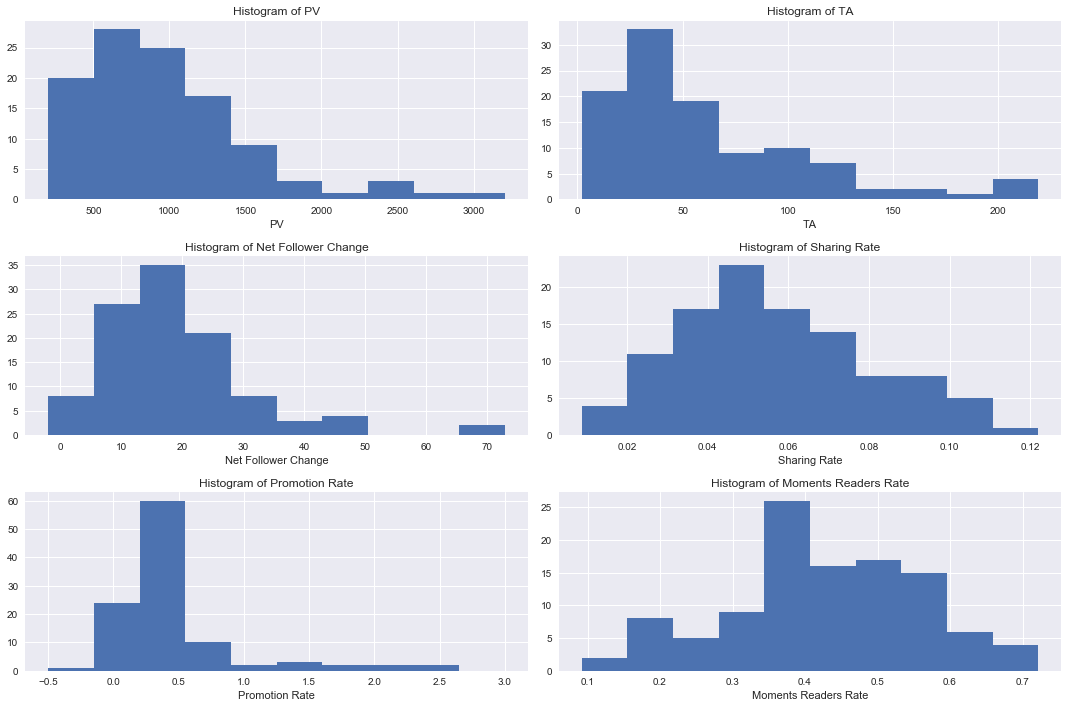

In [11]:
fig = plt.figure(figsize=[15,10])
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

ax1.hist(df['PV'])
ax1.set_title("Histogram of PV")
ax1.set_xlabel("PV")
ax2.hist(df['TA'])
ax2.set_title("Histogram of TA")
ax2.set_xlabel("TA")
ax3.hist(df['net_follower_change'])
ax3.set_title("Histogram of Net Follower Change")
ax3.set_xlabel("Net Follower Change")
ax4.hist(df['share_rate'])
ax4.set_title("Histogram of Sharing Rate")
ax4.set_xlabel("Sharing Rate")
ax5.hist(df['promo_rate'],range = [-0.5,3])
ax5.set_title("Histogram of Promotion Rate")
ax5.set_xlabel("Promotion Rate")
ax6.hist(df['moments_read_rate'])
ax6.set_title("Histogram of Moments Readers Rate")
ax6.set_xlabel("Moments Readers Rate")
fig.tight_layout()
plt.show()

By plotting out the histograms of the key metrics, it is quite obvious that, although most of them follow the normal distribution, the majority of these histograms are skewed to the right. Statistically, the positive skewness implies that the mean and the median of the set are both greater than the mode, which, in this case, shows that most of the posts did not lead directly to either more PV or net follower growth. But firstly, we should examine what might contribute to a successful post. 

There are several factors that determines the popularity of the post, including but not limited to:

    Writing Quality
    Category
    Keywords in Topics 
    


### Exploring Writers

In [12]:
df_owner = df.groupby('Owner').mean().sort_values('PV',ascending=False)
df_950 = df_owner[df_owner['PV']>950]
df_950;

In [13]:
df['Owner'].value_counts()

Qing tian zhu      23
GE生命科学             13
GE医疗                6
Wang Cong           6
Fuxin               5
Ä爱纯派                3
Rui Zhang           3
Carray Tang         3
Gu Jing             3
GELS客户服务            3
Wu Zhi Jie          3
Liu Chang           2
Feng Feng           2
Wu Zhi Jie          2
Hanqing Wang        2
Chao                2
GE马克亭               2
Cell fun club       2
Dong Min            1
Yali Wang           1
Wendy               1
Wang Yali           1
Cao Hong            1
Ming Luo            1
Zhang Yu            1
Chen Cheng          1
Wang Cong           1
Luo Ming            1
Deng Jie            1
Xiang nan           1
Kong Chao           1
Pu Heng & Wu JW     1
Zhang Hao           1
Pan Shun            1
Euphie              1
GE中国                1
Zhao Jianpeng       1
Li Xiaojing         1
Zhang Yang          1
April               1
Liu Wentao          1
Name: Owner, dtype: int64

In [14]:
len(df['Owner'].unique())

41

In [15]:
productive = ["Qing tian zhu","GE生命科学","Wang Cong","GE医疗","Fuxin","Carray Tang","Gu Jing","Rui Zhang","Ä爱纯派", "Wu Zhi Jie", "Liu Chang"
"Feng Feng","GE马克亭","Cell fun club","Chao","Hanqing Wang","Wu Zhijie","GELS客户服务"]
df_950_list = df_950.index.tolist()

Star_writers = list(set(productive).intersection(df_950_list))

There are two criteria for "Star Writers":
    1. The writter must have written more than one article this year.
    2. The average PV of the articles that the writter wrote must be among more than 950, which is a reasonable cutoff to identify the quality of the articles. 
    
Here is the list of "Star Writers":

    ['GE马克亭','GELS客户服务','Cell fun club','Ä爱纯派','Chao','Rui Zhang','Qing tian zhu','GE医疗','GE生命科学']

### Exploring Categories

In [16]:

df.groupby('category').mean().sort_values('PV',ascending=False)

,PV,TA,num_follower,num_unfollow,net_follower_change,word_count,num_pictures,greater_1k,weekday,num_readers,num_sub_read,num_moment,num_favorites,share_rate,promo_rate,sub_read_rate,moments_read_rate,Topic_len
category,,,,,,,,,,,,,,,,,,
AKTA,1153.947368,69.210526,26.421053,9.210526,17.210526,1199.578947,6.105263,0.578947,3.210526,914.473684,347.421053,412.736842,25.157895,0.056918,0.352668,0.408125,0.404797,17.118421
Branding,1085.076923,73.769231,25.153846,7.692308,17.461538,1107.576923,4.230769,0.461538,3.307692,936.884615,295.307692,454.923077,16.923077,0.059860,0.414575,0.385533,0.417774,20.500000
Consumerable,1081.909091,60.954545,28.818182,8.181818,20.636364,867.363636,3.000000,0.500000,3.681818,1104.227273,398.136364,529.227273,29.409091,0.052063,0.455953,0.390467,0.446188,13.772727
Biacore,952.400000,74.800000,25.100000,6.500000,18.600000,1157.700000,4.000000,0.500000,4.600000,896.300000,275.200000,433.000000,24.600000,0.077743,0.261923,0.306990,0.480966,21.750000
BP,792.777778,39.666667,29.777778,8.055556,21.722222,1227.888889,4.500000,0.166667,2.166667,810.722222,269.055556,389.944444,17.111111,0.046396,1.202017,0.366704,0.443169,20.611111
Cell,650.692308,45.846154,22.384615,6.769231,15.615385,814.076923,5.384615,0.153846,1.384615,633.846154,219.000000,278.076923,15.000000,0.058406,0.561415,0.378759,0.396209,16.576923


In [17]:
df.groupby('weekday').mean().sort_values('greater_1k',ascending=False)

,PV,TA,num_follower,num_unfollow,net_follower_change,word_count,num_pictures,greater_1k,num_readers,num_sub_read,num_moment,num_favorites,share_rate,promo_rate,sub_read_rate,moments_read_rate,Topic_len
weekday,,,,,,,,,,,,,,,,,
3,1204.708333,78.833333,26.500000,9.541667,16.958333,1303.916667,6.333333,0.625000,1015.083333,354.250000,485.375000,26.291667,0.062278,0.240749,0.387796,0.435154,19.041667
5,1068.350000,80.050000,28.700000,7.150000,21.550000,1301.900000,4.400000,0.500000,885.650000,288.150000,429.000000,22.650000,0.069832,0.386250,0.331566,0.469367,20.862500
4,881.565217,50.826087,27.478261,8.130435,19.347826,658.782609,3.043478,0.391304,970.478261,367.478261,426.086957,28.739130,0.051966,0.555172,0.396467,0.421016,14.891304
1,1002.050000,60.400000,22.400000,6.400000,16.000000,938.900000,4.250000,0.350000,895.550000,257.650000,459.100000,12.750000,0.056717,0.430355,0.364911,0.417152,16.575000
2,765.450000,37.700000,28.350000,7.950000,20.400000,1146.000000,4.200000,0.150000,758.400000,268.850000,351.700000,15.050000,0.045309,1.184275,0.396901,0.417871,20.300000
7,286.000000,8.000000,11.000000,7.000000,4.000000,751.000000,4.000000,0.000000,348.000000,233.000000,32.000000,13.000000,0.027972,0.500000,0.669540,0.091954,11.000000


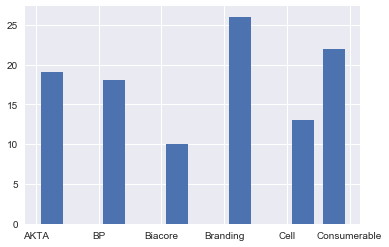

In [18]:
plt.hist(df['category'], rwidth = 0.7)
plt.show()

In [43]:
df.groupby('Type').median().sort_values('PV',ascending=False)

,PV,TA,num_follower,num_unfollow,net_follower_change,word_count,num_pictures,greater_1k,weekday,num_readers,num_sub_read,num_moment,num_favorites,share_rate,promo_rate,sub_read_rate,moments_read_rate,Topic_len
Type,,,,,,,,,,,,,,,,,,
News,1267.5,98.5,22.5,7.5,15.0,1071.5,3.0,1.0,3.0,1006.5,292.5,540.0,18.0,0.063308,0.231224,0.312906,0.531545,20.25
Tech,964.0,62.5,24.0,6.0,16.0,1460.5,4.5,0.0,3.0,849.5,288.0,380.0,23.0,0.062318,0.267145,0.386466,0.422237,20.00
Product,939.0,43.0,24.0,9.0,14.0,750.0,4.0,0.0,3.0,832.0,308.0,362.0,16.0,0.050053,0.340000,0.347305,0.450549,18.00
Tips,817.5,48.0,25.5,7.5,18.0,832.0,4.0,0.0,3.0,881.5,303.5,335.0,21.0,0.059086,0.389566,0.388281,0.384389,14.25
Conference,677.0,37.0,23.5,8.0,15.5,762.0,3.0,0.0,3.0,809.5,399.5,292.5,12.0,0.047373,0.410428,0.427415,0.360895,20.75
N.A.,445.0,12.0,27.0,10.0,19.0,628.0,3.0,0.0,2.0,810.0,249.0,361.0,6.0,0.031949,1.583333,0.340741,0.460494,14.50


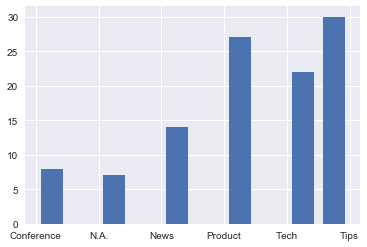

In [20]:
plt.hist(df['Type'], rwidth = 0.7)
plt.show()

In [42]:
cat_count = df['Type'].value_counts()
print(cat_count)

Tips          30
Product       27
Tech          22
News          14
Conference     8
N.A.           7
Name: Type, dtype: int64


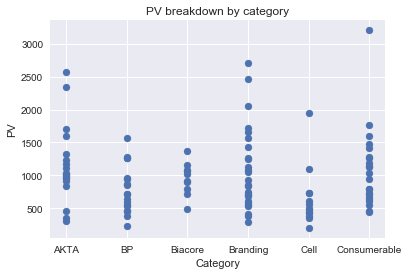

In [22]:
plt.scatter(df['category'],df['PV'])
plt.title("PV breakdown by category")
plt.xlabel("Category")
plt.ylabel("PV")
plt.show()
###bar plot

In [23]:
cat_count = df['category'].value_counts()
cat_count_1000 = df_1000['category'].value_counts()
per = cat_count_1000/cat_count
print(per.sort_values(ascending = False))

AKTA            0.578947
Consumerable    0.500000
Biacore         0.500000
Branding        0.461538
BP              0.222222
Cell            0.153846
Name: category, dtype: float64


From the table above, it seems that the articles in the "BP" and "Cell" categories are less popular than the rest, as only 22% of BP and 15% of Cell's posts have PVs > 1000, which implies that we may need to look into these two categories

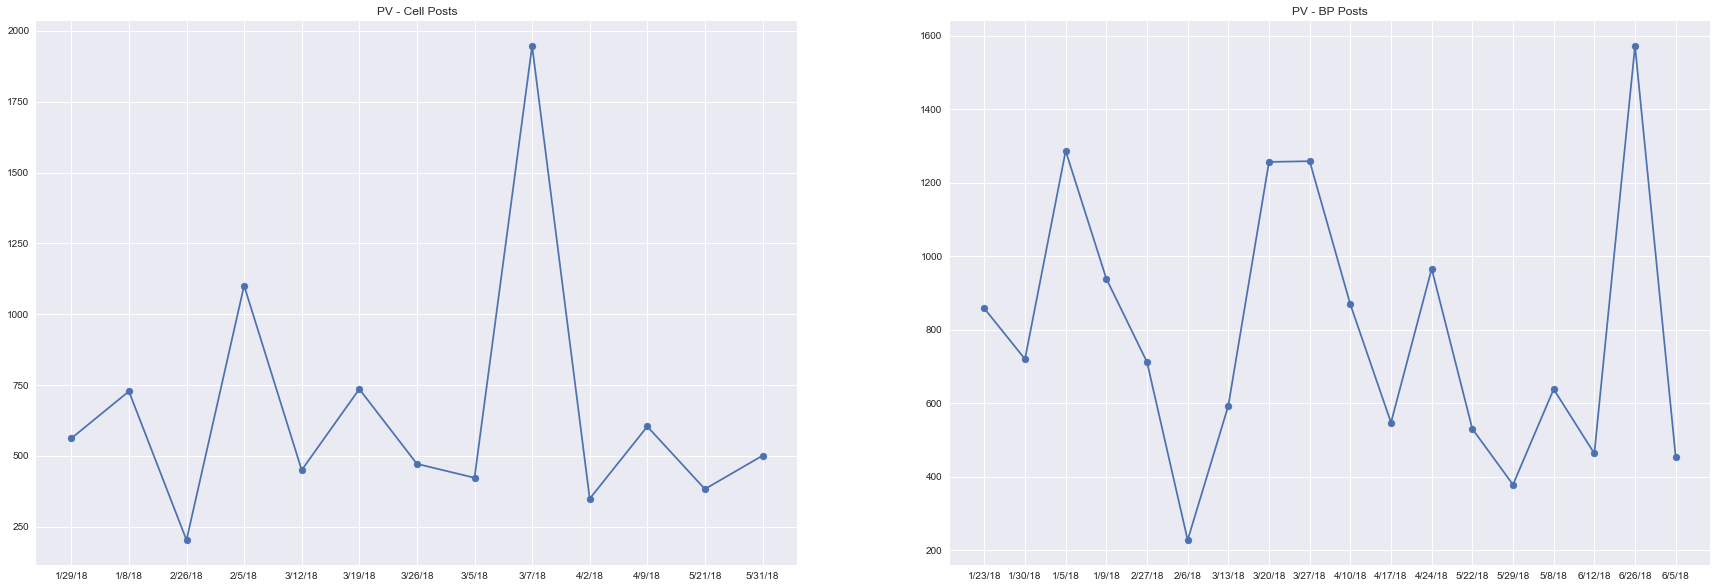

In [24]:
df1 = df.sort_values('Date', ascending=True)
fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(df1[df1['category'] == "Cell"]['Date'],df1[df1['category'] == "Cell"]['PV'])
ax1.plot(df1[df1['category'] == "Cell"]['Date'],df1[df1['category'] == "Cell"]['PV'])
ax1.set_title("PV - Cell Posts")
ax2.scatter(df1[df1['category'] == "BP"]['Date'],df1[df1['category'] == "BP"]['PV'])
ax2.set_title("PV - BP Posts")
ax2.plot(df1[df1['category'] == "BP"]['Date'],df1[df1['category'] == "BP"]['PV'])
plt.show()


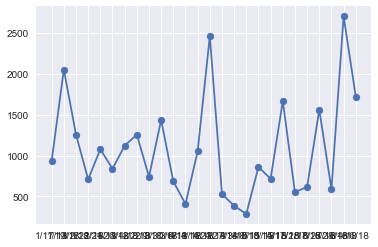

In [25]:
plt.scatter(df1[df1['category'] == "Branding"]['Date'],df1[df1['category'] == "Branding"]['PV'])
plt.plot(df1[df1['category'] == "Branding"]['Date'],df1[df1['category'] == "Branding"]['PV'])
plt.show()

Upon closer scrutiny, The time series analysis of these two categories shows us that there is no increase in PV over last six months. I would recommend to reconsider the strategy regarding these two categories. 

### Exploring Episodes

In [26]:
df.groupby('episode').mean().sort_values('PV',ascending=False)

,PV,TA,num_follower,num_unfollow,net_follower_change,word_count,num_pictures,greater_1k,weekday,num_readers,num_sub_read,num_moment,num_favorites,share_rate,promo_rate,sub_read_rate,moments_read_rate,Topic_len
episode,,,,,,,,,,,,,,,,,,
Ä爱纯派,1225.200000,74.8000,26.300,9.000000,17.300000,1193.6000,6.900000,0.500000,3.0000,1082.900000,378.200000,526.400000,26.200000,0.061389,0.243610,0.382455,0.440509,20.550000
Bioprocess Insights,1152.500000,75.5000,30.000,8.500000,21.500000,1367.5000,1.500000,0.500000,3.0000,1095.000000,402.500000,518.000000,22.000000,0.052547,0.513971,0.424489,0.416943,29.500000
0,991.125000,63.6125,25.675,7.712500,17.962500,1015.4875,4.162500,0.450000,3.2875,897.950000,309.575000,418.750000,21.625000,0.058339,0.438416,0.382562,0.421753,17.178125
Cell fun club,990.571429,67.0000,35.000,8.857143,26.142857,1108.0000,7.142857,0.285714,2.0000,972.571429,270.857143,534.285714,26.142857,0.071426,0.426798,0.300805,0.522318,22.000000
研读,686.000000,20.2500,25.500,6.000000,19.500000,1778.0000,1.500000,0.000000,2.0000,505.250000,244.500000,162.250000,14.000000,0.024557,2.791667,0.503474,0.292990,24.375000
小福说,533.400000,18.8000,28.800,8.600000,20.200000,831.0000,4.400000,0.000000,2.0000,827.800000,250.600000,417.600000,7.800000,0.034135,1.274592,0.312989,0.499889,15.000000


In [27]:
df['episode'].value_counts()

0                      80
Ä爱纯派                   10
Cell fun club           7
小福说                     5
研读                      4
Bioprocess Insights     2
Name: episode, dtype: int64

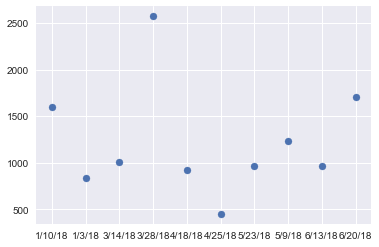

In [28]:
plt.scatter(df[df['episode'] == "Ä爱纯派"]['Date'],df[df['episode'] == "Ä爱纯派"]['PV'])
plt.show()

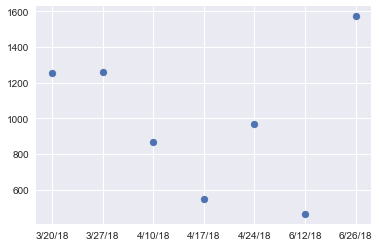

In [29]:
plt.scatter(df[df['episode'] == "Cell fun club"]['Date'],df[df['episode'] == "Cell fun club"]['PV'])
plt.show()

The table above illustrates that we should consider posting more "Ä爱纯派" and "Cell fun club", as they both have strong performance in our key metrics. "小福说", on the other hand, did not get enough click through and the sharing rate is also significantly lower than the rest of the posts (3.4% compared to 5.1%)

## Multivariate Exploratory Data Analysis

In [30]:
data_vis = df.drop(['Topic','Owner','Date','weekday'],axis=1)
corr = data_vis.corr()

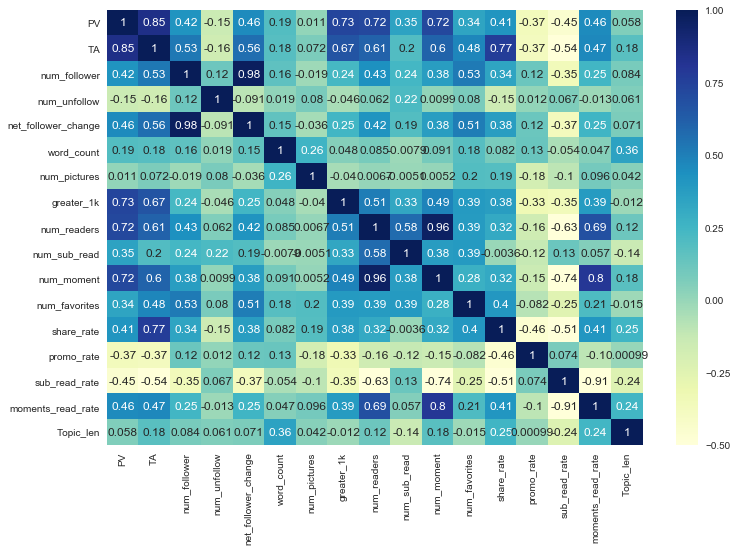

In [31]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr,cmap="YlGnBu",vmin=-0.5,annot=True)
plt.show()

The heatmap describes the correlation between two variables in our dataset, here are a few key takeaways:

1. Word count is positively correlated with TA, sharing rate, number of favorites ,and moments read rate, which suggests that the longer the article, possibly due to the highly technical information it contains, the more popular it is among our readers.
2. Moments Read Rate is positively related to other key metrics, which explains why "Moments" section, instead of "Subscription" section, should drive more click throughs and new followers. Therefore, we should prioritize TA and the number of readers who clicks our posts in the "Moments" section.
3. There is no correlation between topic length and PV, which implies that it is the content and the category that leads to a higher PV number rather than the length of the topic. 

Still, these insights requires more analysis and I will try to tackle each of them individually. 

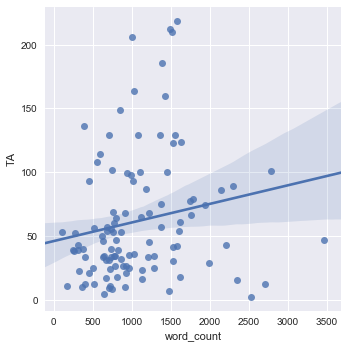

In [32]:
sns.lmplot(x='word_count', y='TA', data=data)
plt.show()

The regression graph plots out the relationship between word count and TA, and we can see that most of the articles with a high TA have word count between 500 to 1500. This relationship may be attributed to the key characteristics of our audience. The main audience of our official account works in the research-focued life sciences industry and, thus, prefers posts related to the latest research topics in the industry. As these topics are difficult to explain within 500 words, the posts with less than 500 words would not be widely shared. However, while fragmented reading has become one of the most important features of social media, WeChat users are less likely to spend more than 5 minutes reading the article. Consequently, we should try to constrain the length of the article within the range of 500 to 1500, with more focus on research articles. 

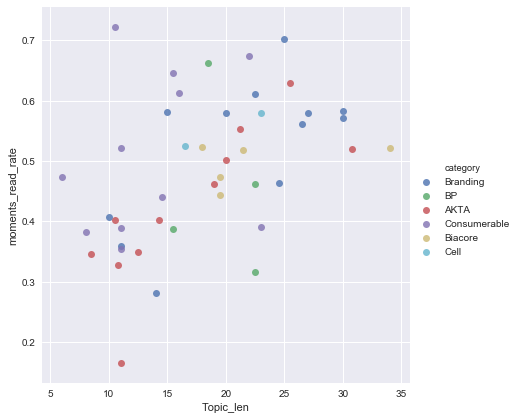

In [33]:
sns.lmplot('Topic_len', 'moments_read_rate',data=df_1000,hue= 'category', size = 6, fit_reg=False)
plt.show()

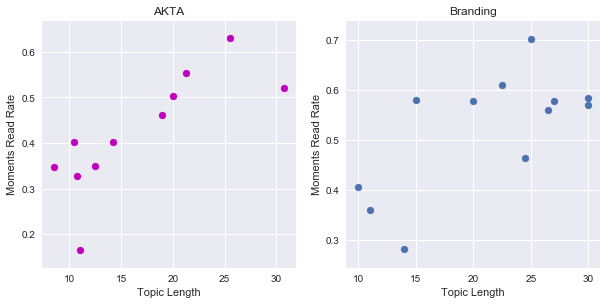

In [34]:
fig = plt.figure(figsize=[10,10])
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.scatter(df_1000[df_1000['category'] == "AKTA"]['Topic_len'],df_1000[df_1000['category'] == "AKTA"]['moments_read_rate'],color = 'm')
ax1.set_title("AKTA")
ax1.set_xlabel("Topic Length")
ax1.set_ylabel("Moments Read Rate")
ax2.scatter(df_1000[df_1000['category'] == "Branding"]['Topic_len'],df_1000[df_1000['category'] == "Branding"]['moments_read_rate'])
ax2.set_title("Branding")
ax2.set_xlabel("Topic Length")
ax2.set_ylabel("Moments Read Rate")
plt.show()

The scatter plot above shows us the relationship between topic length and Moments read rate. If we use 0.5 as a threshold, as might be seen, the majority of the articles with higher moment reader rate has more than 15 words in its topic. Moreover, if we look at specific categories, such as "AKTA", "Consumerable" and "Branding, the correlation is even stronger. As the previous section demonstrated, a higher moments share rate will lead to an increase in net follower change and PV. Hence, we should consider paying more attention not only to the content but also the format of the topic to attract more traffic, especially those coming directly from WeChat Moments. 
## Longer 

The 2X2 Table below illustrates the relationship between Moments Reader Rate and other key metrics, which further provides evidence for 

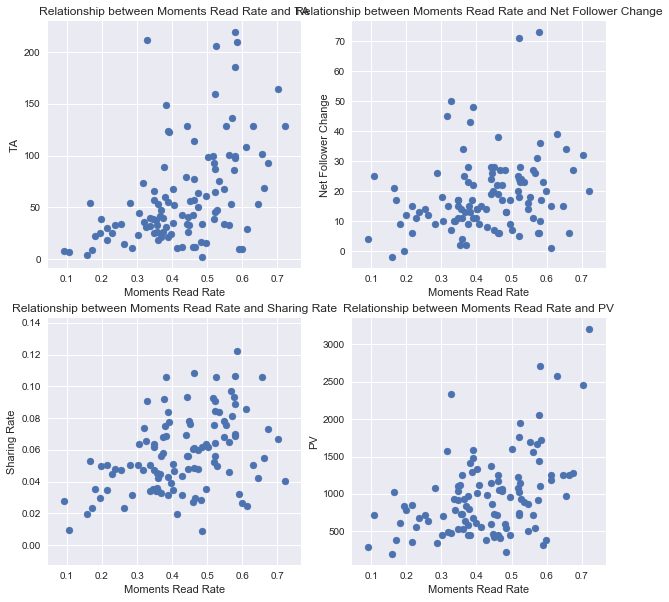

In [35]:
fig = plt.figure(figsize=[10,10])
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.scatter(df['moments_read_rate'],df['TA'])
ax1.set_title("Relationship between Moments Read Rate and TA")
ax1.set_xlabel("Moments Read Rate")
ax1.set_ylabel("TA")
ax2.scatter(df['moments_read_rate'],df['net_follower_change'])
ax2.set_title("Relationship between Moments Read Rate and Net Follower Change")
ax2.set_xlabel("Moments Read Rate")
ax2.set_ylabel("Net Follower Change")
ax3.scatter(df['moments_read_rate'],df['share_rate'])
ax3.set_title("Relationship between Moments Read Rate and Sharing Rate")
ax3.set_xlabel("Moments Read Rate")
ax3.set_ylabel("Sharing Rate")
ax4.scatter(df['moments_read_rate'],df['PV'])
ax4.set_title("Relationship between Moments Read Rate and PV")
ax4.set_xlabel("Moments Read Rate")
ax4.set_ylabel("PV")
plt.show()

In [36]:
def topic_split(df):
    word_list = []
    for items in df:
        word = items.split(' ')
        word_list.append(word)
    return word_list

In [37]:
df_1000 = df[df['PV']>=1000]
word_list = topic_split(df['Topic'])

In [38]:
#Tokenization of the topic
word = []
phrase = []
parsed = []
for sublist in word_list:
    for item in sublist:
        word.append(item)
for w in word:   
    seg_list = jieba.lcut_for_search(w)
    phrase.append(seg_list)
for sublist in phrase:
    for item in sublist:
        parsed.append(item)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/9z/kb_qrjjx76s4vx9wzc8d2mbc0000gn/T/jieba.cache
Loading model cost 0.929 seconds.
Prefix dict has been built succesfully.


(-0.5, 999.5, 499.5, -0.5)

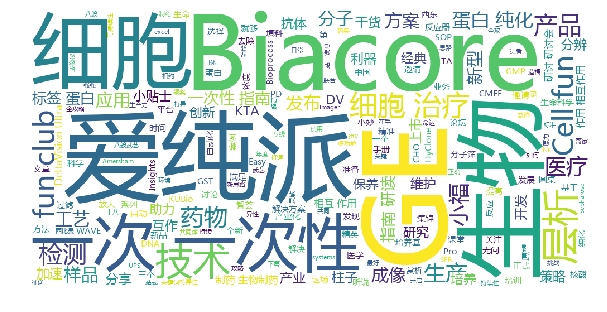

In [39]:
#Build a wordcloud based on the topic
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
d = '/Users/Steve/Desktop/GE'
#ge_mask = np.array(Image.open(path.join(d, 'ge.png')))
unique_string=(" ").join(parsed)
wordcloud = WordCloud(width = 1000, height = 500, font_path='/Users/Steve/Downloads/微软雅黑.ttf',background_color='white').generate(unique_string)
plt.figure(figsize=[10,8])
plt.imshow(wordcloud)
plt.axis("off")

Actionable:
1. Longer subject line
2. Category - AKTA
3. 500 to 1500 with more dry stuff
4. Create a database 

Insights:
1. Prioritize traffic from wechat moment
2. zombie followers
3. 